In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import numpy as np
import streamlit as st

### read data

In [48]:
pd.read_csv('retail_store_sales.csv').head(3)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,08-04-24,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,23-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,05-10-22,False


In [49]:
df = pd.read_csv('retail_store_sales.csv')

In [50]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


### handling missing values

In [51]:
df.isnull()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,False,False,False,False,False,False,False,False,False,False,True
12571,False,False,False,False,False,False,False,False,False,False,False
12572,False,False,False,False,False,False,False,False,False,False,True
12573,False,False,False,False,False,False,False,False,False,False,False


In [52]:
df.isnull().sum()   #before

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [53]:
df['Discount Applied'] = df['Discount Applied'].fillna('False')

In [54]:
df.dropna(subset=['Item'], inplace=True)

In [55]:
df.isnull().sum()   #after

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

### converting to correct Column Data Type 

In [56]:
df.info()   #before

<class 'pandas.core.frame.DataFrame'>
Index: 11362 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    11362 non-null  object 
 1   Customer ID       11362 non-null  object 
 2   Category          11362 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11362 non-null  float64
 5   Quantity          11362 non-null  float64
 6   Total Spent       11362 non-null  float64
 7   Payment Method    11362 non-null  object 
 8   Location          11362 non-null  object 
 9   Transaction Date  11362 non-null  object 
 10  Discount Applied  11362 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.0+ MB


In [57]:
df['Quantity'] = pd.to_numeric(df['Quantity']).astype(int)

In [58]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date']);

C:\Users\Taha mohamed\AppData\Local\Temp\ipykernel_21128\704311615.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [59]:
df['Discount Applied'] = df['Discount Applied'].astype(bool)

In [60]:
df.info()   #after

<class 'pandas.core.frame.DataFrame'>
Index: 11362 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    11362 non-null  object        
 1   Customer ID       11362 non-null  object        
 2   Category          11362 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11362 non-null  float64       
 5   Quantity          11362 non-null  int64         
 6   Total Spent       11362 non-null  float64       
 7   Payment Method    11362 non-null  object        
 8   Location          11362 non-null  object        
 9   Transaction Date  11362 non-null  datetime64[ns]
 10  Discount Applied  11362 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 987.5+ KB


In [61]:
df.head(1)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-08-04,True


In [62]:
# Extract year
df['year'] = df['Transaction Date'].dt.year

# Extract Month
df['month'] = df['Transaction Date'].dt.month_name()

# Extract day
df['day'] = df['Transaction Date'].dt.day

df.head(1)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,year,month,day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-08-04,True,2024,August,4


In [86]:
df.to_csv('cleaned.csv', index=False)

### visualization

In [63]:
num_cols = df.select_dtypes(include= 'number').columns
num_cols

Index(['Price Per Unit', 'Quantity', 'Total Spent', 'year', 'day'], dtype='object')

In [64]:
for col in num_cols:
    px.histogram(df, x= col).show()

In [65]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied', 'year', 'month', 'day'],
      dtype='object')

In [66]:
px.box(df, y='Price Per Unit')

In [67]:
px.box(df, y='Total Spent')

C:\Users\Taha mohamed\AppData\Local\Temp\ipykernel_21128\2037232845.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




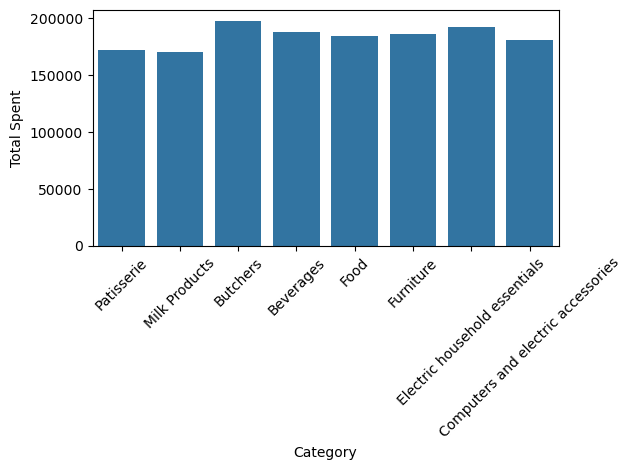

In [68]:
sns.barplot(data=df, x='Category', y='Total Spent', estimator='sum', ci=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

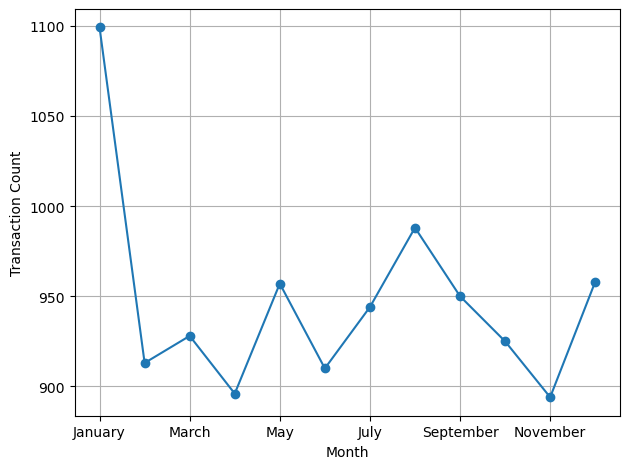

In [69]:
monthly_counts = df['month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])
monthly_counts.plot(kind='line', marker='o')
plt.ylabel("Transaction Count")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

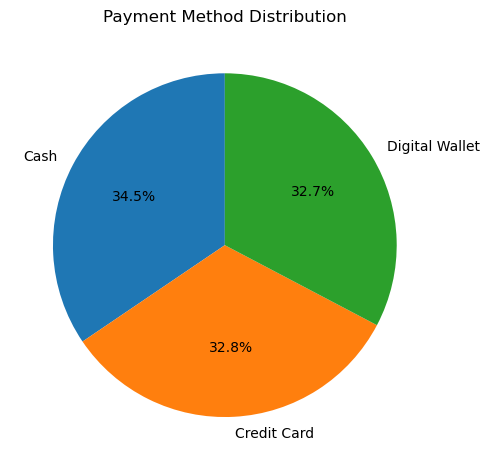

In [70]:
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.title("Payment Method Distribution")
plt.tight_layout()
plt.show()

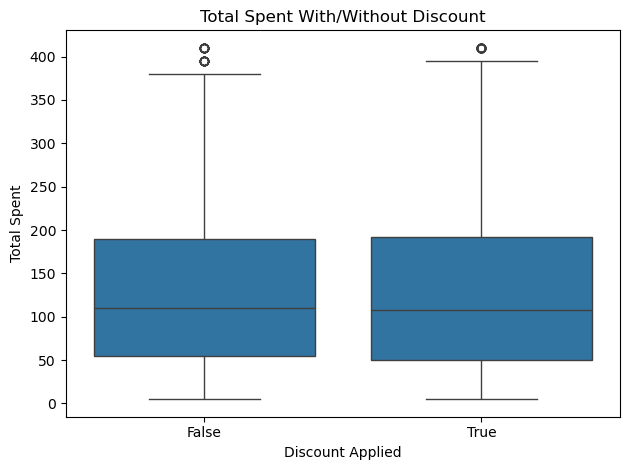

In [71]:
sns.boxplot(data=df, x='Discount Applied', y='Total Spent')
plt.title("Total Spent With/Without Discount")
plt.tight_layout()
plt.show()

In [72]:
fig = px.treemap(df, path=['Location', 'Category'], values='Total Spent', title='Spending by Location and Category')
fig.show()

C:\Users\Taha mohamed\AppData\Local\Temp\ipykernel_21128\3410035678.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



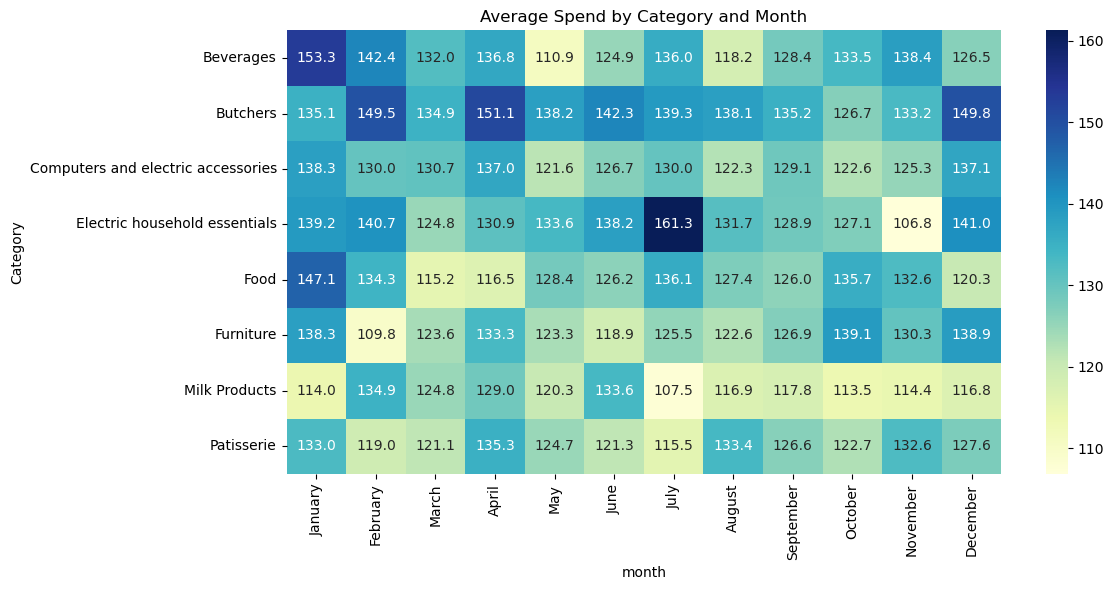

In [73]:
df['month'] = pd.Categorical(df['month'], categories=[
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'], ordered=True)

heat_data = df.pivot_table(index='Category', columns='month', values='Total Spent', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(heat_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Average Spend by Category and Month")
plt.tight_layout()
plt.show()

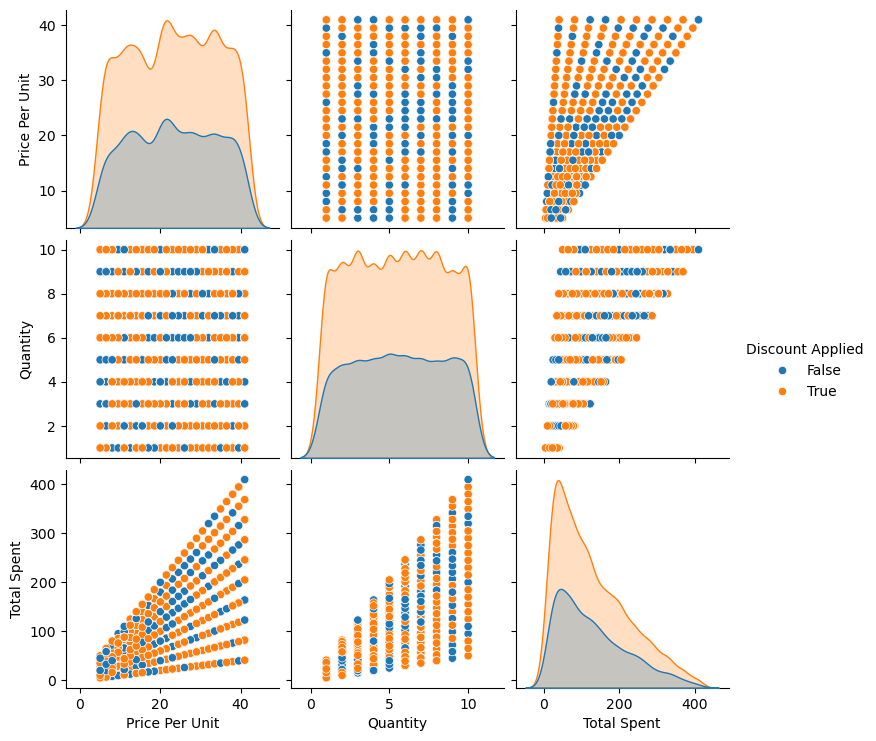

In [74]:
sns.pairplot(df, vars=['Price Per Unit', 'Quantity', 'Total Spent'], hue='Discount Applied')

# analysys questions

### 1. Customers with many small purchases

In [75]:
data = df.groupby('Customer ID').agg({'Total Spent': 'sum', 'Transaction ID': 'count'})
top_frequent = data.sort_values(by=['Transaction ID', 'Total Spent'], ascending=[False, False]).head(5)
print(top_frequent)

             Total Spent  Transaction ID
Customer ID                             
CUST_05          63855.5             497
CUST_13          63015.5             491
CUST_24          64608.0             489
CUST_08          62850.5             480
CUST_15          60749.5             478


### 2. Which categories make the most money


In [76]:
df.groupby('Category')['Total Spent'].mean().sort_values(ascending=False)

Category
Butchers                              138.934553
Electric household essentials         133.918928
Beverages                             131.729853
Computers and electric accessories    129.493558
Food                                  129.484572
Furniture                             127.758219
Patisserie                            125.880570
Milk Products                         119.822807
Name: Total Spent, dtype: float64

### 3. Sales over time

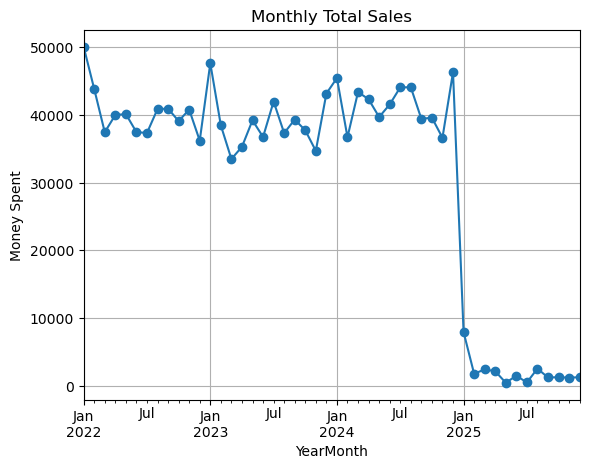

In [77]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['YearMonth'] = df['Transaction Date'].dt.to_period('M')
monthly = df.groupby('YearMonth')['Total Spent'].sum()

monthly.plot(marker='o', title='Monthly Total Sales')
plt.ylabel('Money Spent')
plt.grid(True)
plt.show()


### 4. Do people spend more online or in-store?

In [78]:

location_totals = df.groupby('Location')['Total Spent'].sum().reset_index()
fig = px.pie(location_totals, names='Location', values='Total Spent', title='Online vs In-Store Spending', hole=0.3)
fig.show()

### 5. Total revenue generated each year

In [79]:
df.groupby('year')['Total Spent'].sum()

year
2022    484301.5
2023    465149.5
2024    499336.0
2025     24211.5
Name: Total Spent, dtype: float64

### 6. Category with highest quantity sold

In [80]:
df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

Category
Furniture                             8083
Beverages                             7974
Food                                  7925
Electric household essentials         7897
Milk Products                         7889
Computers and electric accessories    7832
Butchers                              7774
Patisserie                            7515
Name: Quantity, dtype: int64

### 7. Seasonal trends in sales by month

In [81]:
df.groupby('month')['Total Spent'].sum().sort_values(ascending=False)

C:\Users\Taha mohamed\AppData\Local\Temp\ipykernel_21128\64607190.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



month
January      151134.0
December     126976.0
August       124840.0
July         123920.0
September    120917.0
February     120806.5
April        119780.0
May          119514.5
October      117719.5
June         117267.5
March        116777.0
November     113346.5
Name: Total Spent, dtype: float64

### 8. does price of each categories change accourding to the month

In [82]:
df.groupby(['month', 'Category'])['Quantity'].sum().unstack().fillna(0)

C:\Users\Taha mohamed\AppData\Local\Temp\ipykernel_21128\1475999093.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Category,Beverages,Butchers,Computers and electric accessories,Electric household essentials,Food,Furniture,Milk Products,Patisserie
month,,,,,,,,
January,794,743,900,732,895,824,719,735
February,662,676,501,654,721,667,657,648
March,732,583,534,659,603,598,691,632
April,568,598,655,686,535,809,635,537
May,604,574,584,676,664,669,682,663
June,742,699,690,563,488,633,615,623
July,664,636,646,712,730,652,714,551
August,673,624,662,745,703,709,587,693
September,620,628,685,643,639,604,681,598


# streamlit app

In [105]:
%%writefile mid_project.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import numpy as np
import streamlit as st
html_title = """<h1 style="color:red;text-align:center;">retail_store_sales</h1>"""
st.markdown(html_title,unsafe_allow_html=True)
st.image('photo-1604719312566-8912e9227c6a.jpg' )
tab1, tab2, tab3, tab4 = st.tabs(["Dataset uncleaned","Dataset cleaned", "Visualizations", "About"])
columns = [
    "Transaction ID: A unique identifier for each transaction.",
    "Customer ID: A unique identifier for each customer.",
    "Category: The category of the purchased item.",
    "Item: The name of the purchased item.",
    "Price Per Unit: The static price of a single unit of the item.",
    "Quantity: The quantity of the item purchased.",
    "Total Spent: The total amount spent on the transaction.",
    "Payment Method: The method of payment used.",
    "Location: The location where the transaction occurred.",
    "Transaction Date: The date of the transaction.",
    "Discount Applied: Indicates whether a discount was applied to the transaction."
]
with tab1:
    st.subheader("Dataset uncleaned")
    df_uncleaned = pd.read_csv('uncleaned.csv')
    st.dataframe(df_uncleaned.head(3))
    st.write(df_uncleaned.describe())
    st.write("Missing values before cleaning:")
    st.write(df_uncleaned.isnull().sum())
    st.write("Columns:", columns)
with tab2:
    st.subheader("Dataset cleaned")
    df_cleaned = pd.read_csv('cleaned.csv')
    st.dataframe(df_cleaned.head(3))
    st.write(df_cleaned.describe())
    st.write("Missing values after cleaning:")
    st.write(df_cleaned.isnull().sum())
with tab3:
   
   
   
    st.subheader("Visualizations")
    st.write("Total Spent by Category")
    fig1, ax1 = plt.subplots(figsize=(10, 5))
    sns.barplot(data=df_cleaned, x='Category', y='Total Spent', estimator='sum', ci=None, ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    st.pyplot(fig1)

    st.write("Monthly Transaction Counts")
    monthly_counts = df_cleaned['month'].value_counts().reindex([
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ])
    plt.figure(figsize=(8, 4))
    monthly_counts.plot(kind='line', marker='o')
    plt.ylabel("Transaction Count")
    plt.xlabel("Month")
    plt.grid(True)
    plt.tight_layout()
    st.pyplot(plt.gcf())

    st.write("Payment Method Distribution")
    plt.figure(figsize=(6, 6))
    df_cleaned['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.ylabel("")
    plt.title("Payment Method Distribution")
    plt.tight_layout()
    st.pyplot(plt.gcf())
    st.write("Total Spent With/Without Discount")
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_cleaned, x='Discount Applied', y='Total Spent')
    plt.title("Total Spent With/Without Discount")
    plt.tight_layout()
    st.pyplot(plt.gcf())
    st.write("Spending by Location and Category")







    fig2 = px.treemap(df_cleaned, path=['Location', 'Category'], values='Total Spent', title='Spending by Location and Category')
    st.plotly_chart(fig2)
    st.write("Average Spend by Category and Month")
    heat_data = df_cleaned.pivot_table(index='Category', columns='month', values='Total Spent', aggfunc='mean')
    plt.figure(figsize=(12,6))
    sns.heatmap(heat_data, cmap="YlGnBu", annot=True, fmt=".1f")
    plt.title("Average Spend by Category and Month")
    plt.tight_layout()
    st.pyplot(plt.gcf())
    st.write("Pairplot of Price Per Unit, Quantity, and Total Spent")
    sns.pairplot(df_cleaned, vars=['Price Per Unit', 'Quantity', 'Total Spent'], hue='Discount Applied')
    st.pyplot(plt.gcf())
    st.write("Top 5 Customers by Total Spent and Transaction Count")
    data = df_cleaned.groupby('Customer ID').agg({'Total Spent': 'sum', 'Transaction ID': 'count'})
    top_frequent = data.sort_values(by=['Transaction ID', 'Total Spent'], ascending=[False, False]).head(5)
    st.dataframe(top_frequent)
    st.write("Monthly Total Sales")
    df_cleaned['Transaction Date'] = pd.to_datetime(df_cleaned['Transaction Date'])
    df_cleaned['YearMonth'] = df_cleaned['Transaction Date'].dt.to_period('M')
    monthly = df_cleaned.groupby('YearMonth')['Total Spent'].sum()
    plt.figure(figsize=(10, 5))
    monthly.plot(marker='o', title='Monthly Total Sales')
    plt.ylabel('Money Spent')
    plt.grid(True)
    plt.show()
    st.pyplot(plt.gcf())
    st.write("Online vs In-Store Spending")
    location_totals = df_cleaned.groupby('Location')['Total Spent'].sum().reset_index()
    st.write("Total Spent by Location")
    st.dataframe(location_totals) 
    st.write("Pie Chart of Online vs In-Store Spending")
    st.write("Total Spent by Location")
    st.dataframe(location_totals)
    




    
    fig3 = px.pie(location_totals, names='Location', values='Total Spent', title='Online vs In-Store Spending', hole=0.3)
    st.plotly_chart(fig3)
    st.write("Total Spent by Year")
    st.dataframe(df_cleaned.groupby('year')['Total Spent'].sum())
    st.write("Total Quantity Sold by Category")
    st.dataframe(df_cleaned.groupby('Category')['Quantity'].sum().sort_values(ascending=False))
    st.write("Total Spent by Month")
    st.dataframe(df_cleaned.groupby('month')['Total Spent'].sum().sort_values(ascending=False))
    st.write("Total Quantity Sold by Month and Category")
    st.dataframe(df_cleaned.groupby(['month', 'Category'])['Quantity'].sum().unstack(fill_value=0)) 




with tab4:
    st.subheader("About")
    st.write("This project analyzes retail store sales data to uncover insights about customer behavior, spending patterns, and product performance. The dataset includes transaction details such as date, location, category, payment method, and discounts applied.")
    st.write("The analysis includes data cleaning, exploratory data analysis (EDA), and various visualizations to present findings.")
    st.write("The project uses libraries such as Pandas, Matplotlib, Seaborn, and Plotly for data manipulation and visualization.")

Overwriting mid_project.py


In [84]:
! streamlit run mid_project.py

^C
